# CS146 Assignment 2
## Fall 2019, Cs 146
### Berfin Karaman

#### 1. Call center data modeling

Complete the call center data modeling assignment we start in the Pre-class work and Activity 2
breakouts of Session 2.2. You may re-use and build on all code or any other work from the class
session.


In class, we completed the Bayesian data modeling problem for 1 hour of the day. In this
assignment, you need to do the same analysis for all 24 hours of the day.

1. Compute a 98% posterior confidence interval over the number of calls per minute (the call
rate λ ) for each hour of the day — so you will have 24 confidence intervals. Also, compute
the posterior mean of λ for each hour of the day.

2. Present your results graphically using Matplotlib. Make a plot that looks like the one below.
Each dot is at the posterior mean and each line shows a 98% confidence interval for a λ.
You can use the errorbar() function in the plotting library to do this.

3. Write a paragraph (100–200 words) to accompany your plot and present your findings to
the client. Carefully summarize how many calls you expect during different parts of the day,
and how much uncertainty there is in your estimates. Remember that the client is not an
expert in statistics, so make it easy for them to understand. You may also make additional
plots to help communicate your results.

In [12]:
import numpy as np
import scipy as sp
import scipy.stats as sts
import matplotlib.pyplot as plt

%matplotlib inline

# Load the data set containing durations between calls arriving at the call
# center during 1 day. All values are in minutes.
waiting_times_day = np.loadtxt('call_center.csv')

# Make 24 empty lists, one per hour.
waiting_times_per_hour = [[] for _ in range(24)]

# Split the data into 24 separate series, one for each hour of the day.
current_time = 0
for t in waiting_times_day:
    current_hour = int(current_time // 60)
    current_time += t
    waiting_times_per_hour[current_hour].append(t)


In [11]:
# Exponential distribution with maximum likelihood fit to the data

# THE LIKELIHOOD FUNCTION
#
# This function takes 2 inputs, namely the parameter (λ) value at which to
# compute the likelihood and a value from the data set. You need to evaluate
# the exponential distribution of the datum given the parameter value.

def likelihood(lambda_, datum):
    return sts.expon(scale=1/lambda_).pdf(datum)

# THE PRIOR DISTRIBUTION
#
# This function takes 1 input, namely the parameter value (λ) at which to
# compute the prior probability density. You need to evaluate the distribution
# Gamma(λ | α, β).

def prior(lambda_):
    return sts.gamma(1, scale=1/0.25).pdf(lambda_)

# THE POSTERIOR DISTRIBUTION
#
# The function below is provided to help make computing the posterior easier. It
# follows the same pattern as in the previous class, where we multiple the prior
# and the likelihood evaluated at various values of the parameter (λ).
#
# You will see the function uses the logarithms of various distributions. This
# is for numerical reasons. When you multiply lots of likelihood values, the
# result can become very large or very small, causing numerical overflow or
# underflow in Python. Taking logarithms avoids this problem.

def compute_posterior(parameter_values, prior, likelihood, data):
    log_prior = np.log(prior(parameter_values))
    log_likelihood = np.array([
        np.sum(np.log(likelihood(param, data)))
        for param in parameter_values])
    unnormalized_log_posterior = log_prior + log_likelihood
    unnormalized_log_posterior -= max(unnormalized_log_posterior)
    unnormalized_posterior = np.exp(unnormalized_log_posterior)
    area = sp.integrate.trapz(unnormalized_posterior, parameter_values)
    posterior = unnormalized_posterior / area
    return posterior

def compute_percentile(parameter_values, distribution_values, percentile):
    '''
    Compute the parameter value at a particular percentile of the given
    probability distribution values. This function uses the cumulative trapezoid
    integrator in SciPy.

    Inputs:

        parameter_values (array of float) This is the list of parameter values
          at which the probability distribution has been evaluated.

        distribution_values (array of float) This is the list of values of the
          probability density function evaluated at the parameter values above.

        percentile (float) This is the value between 0 and 1 of the percentile
          to compute.

    Returns: (float) The parameter value at the given percentile.
    '''
    cumulative_distribution = sp.integrate.cumtrapz(
        distribution_values, parameter_values)
    percentile_index = np.searchsorted(cumulative_distribution, percentile)
    return lambdas[percentile_index]

#empty lists to store the mean values for each hour and the confidence intervals
x=[]
y=[]
dy=[]
for i in range(0, 23):
    hour_index = i

    waiting_times_hour = waiting_times_per_hour[hour_index]
    
    lambda_ = 1 / np.mean(waiting_times_hour)
    distribution = sts.expon(scale=1/lambda_)

 
    lambdas = np.linspace(0, 10, 501)[1:]
    posterior = compute_posterior(lambdas, prior, likelihood, waiting_times_hour)

    # Calculates the confidence interval for 98%
    percentiles = [compute_percentile(lambdas, posterior, p) for p in [0.01, 0.99]]
    print('Posterior 98% interval for',hour_index,":", percentiles, 'calls per minute')
    # Calculates the expected value by using the likelihood and the prior
    lambda_ = sp.integrate.trapz(posterior * lambdas, lambdas)
    x.append(hour_index)
    y.append(lambda_)
    (percentiles[1]-percentiles[0])/2
    dy.append((percentiles[1]-percentiles[0])/2)
    print('Expected value: λ =', lambda_, 'calls per minute')
    
#if we want to graph the individual pdf graphs for each hour we can use the following code.
"""plt.figure(figsize=(8, 6))
    plt.plot(lambdas, posterior, label='posterior')
    plt.axvline(percentiles[0], color='red', linestyle=':', label='98% interval')
    plt.axvline(percentiles[1], color='red', linestyle=':')
    plt.xlabel('λ [calls per minute]')
    plt.ylabel('probability density')
    plt.title(f'Inference results for hour {hour_index}')
    plt.legend()
    plt.show()"""


Posterior 98% interval for 0 : [0.02, 0.2] calls per minute
Expected value: λ = 0.09844355612748837 calls per minute
Posterior 98% interval for 1 : [0.02, 0.16] calls per minute
Expected value: λ = 0.07583345264771416 calls per minute
Posterior 98% interval for 2 : [0.02, 0.18] calls per minute
Expected value: λ = 0.09130949558511654 calls per minute
Posterior 98% interval for 3 : [0.08, 0.46] calls per minute
Expected value: λ = 0.24265309377012 calls per minute
Posterior 98% interval for 4 : [0.26, 0.66] calls per minute
Expected value: λ = 0.4423328964613368 calls per minute
Posterior 98% interval for 5 : [0.64, 1.2] calls per minute
Expected value: λ = 0.903312144529943 calls per minute
Posterior 98% interval for 6 : [1.22, 1.98] calls per minute
Expected value: λ = 1.5911875564257962 calls per minute
Posterior 98% interval for 7 : [2.38, 3.4] calls per minute
Expected value: λ = 2.8810069616056153 calls per minute
Posterior 98% interval for 8 : [3.66, 4.9] calls per minute
Expecte

"plt.figure(figsize=(8, 6))\n    plt.plot(lambdas, posterior, label='posterior')\n    plt.axvline(percentiles[0], color='red', linestyle=':', label='98% interval')\n    plt.axvline(percentiles[1], color='red', linestyle=':')\n    plt.xlabel('λ [calls per minute]')\n    plt.ylabel('probability density')\n    plt.title(f'Inference results for hour {hour_index}')\n    plt.legend()\n    plt.show()"

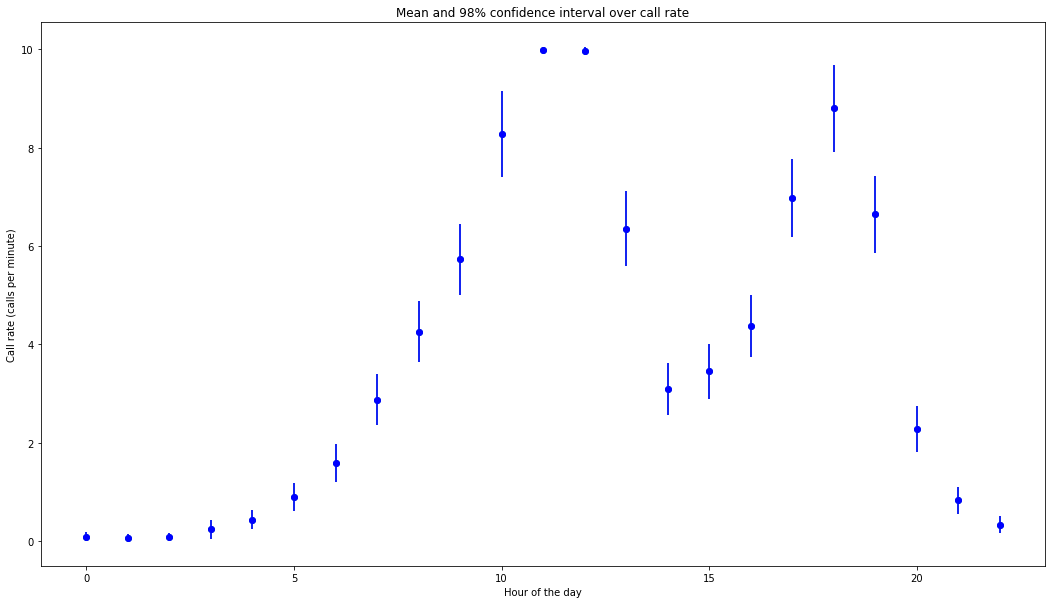

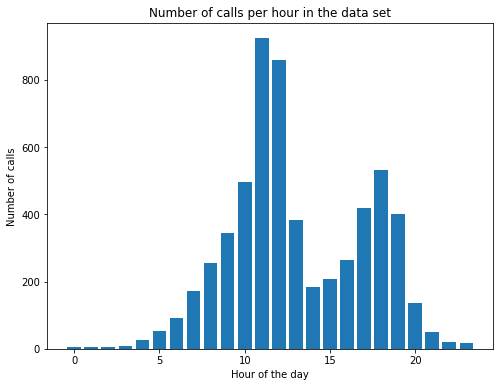

In [10]:

#Plot for the means and 98% confidence interval
plt.figure(figsize=(18, 10))
plt.errorbar(x, y, yerr=dy, fmt='o')
plt.xlabel('Hour of the day')
plt.ylabel('Call rate (calls per minute)')
plt.title('Mean and 98% confidence interval over call rate')
plt.errorbar(x, y, yerr=dy, fmt='o', color ="blue")
plt.show()


# Plot the number of calls per hour using a bar chart to help the client see the over all 
plt.figure(figsize=(8, 6))
plt.bar(range(24), [len(w) for w in waiting_times_per_hour])
plt.xlabel('Hour of the day')
plt.ylabel('Number of calls')
plt.title('Number of calls per hour in the data set')
plt.show()



###### 3. Write a paragraph (100–200 words) to accompany your plot and present your findings to the client. Carefully summarize how many calls you expect during different parts of the day, and how much uncertainty there is in your estimates. Remember that the client is not an expert in statistics, so make it easy for them to understand. You may also make additional plots to help communicate your results.

The first graph is a scatter plot that shows the call rate of each hour throughout the day. On the x-axis, we have the hours of the day, and on the y-axis, we have the expected calls per minute in the given hour. The number of calls should be integer however when you want to find the average number of class per minute; you will need to average the calls that received in an hour to come up with an estimated value. The error bars in the graph illustrates the 98% confidence interval. In other words, we are 98% confident that the average calls per minute at a given hour will be in this interval. The second graph is a bar chart that shows the total number of calls per hour change over 24 hours. As of the analysis, until 5 am, the expected number of calls per minute is under 1. From 5 am to 12 pm, the expected calls per minute increase ever hour and reache almost 10 calls per minute at 12 pm. Until 2 pm, the expected number of calls have a decreasing trend. Then starting from 3 pm, the number of expected calls starts increasing and makes a peak at 6 pm. Overall we can observe too peak time hours, firstly around noon/lunchtime and then around 6 pm when people generally finish work. Employing more people for the given shifts can be an excellent way to optimize consumer services via the call center. 